In [211]:
import json
import requests
import re
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
#Crawl the link
url = "https://chordify.net/chords/avantasia-songs/let-the-storm-descend-upon-you-chords"
page = requests.get(url).text
soup = BeautifulSoup(page, 'lxml');

In [91]:
link = soup.find('link', href=re.compile('api/v2/songs/youtube'))
sufix = link['href']
prefix = 'https://chordify.net'
new_url = prefix+sufix


In [92]:
new_url

'https://chordify.net/api/v2/songs/youtube:3ZJgUvhhKpE/chords?vocabulary=extended_inversions'

In [251]:
#Scrap the json
url = new_url
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req)
data = json.loads(webpage.read())

In [ ]:
data

In [264]:
tonalidad

'F'

In [103]:
def to_arr(chords):
    ch_arr = []
    for i in range(len(chords)):
        x = chords[i][2:7]
        ch_arr.append(x)
    return ch_arr

In [127]:
ch_arr = to_arr(chords)

In [130]:
to_remove = [s for s in ch_arr if s.startswith('N')]
for i in to_remove:
    ch_arr.remove(i)

In [281]:
grados = ['Ib',
          'I',
          'I#',
          'IIb',
          'II',
          'II#',
          'IIIb',
          'III',
          'III#',
          'IVb',
          'IV',
          'IV#',
          'Vb',
          'V',
          'V#',
          'VIb',
          'VI',
          'VI#',
          'VIIb',
          'VII',
          'VII#']
acordes = (['Cb',
            'C',
            'C#',
            'Db',
            'D',
            'D#',
            'Eb',
            'E',
            'E#',
            'Fb',
            'F',
            'F#',
            'Gb',
            'G',
            'G#',
            'Ab',
            'A',
            'A#',
            'Bb',
            'B',
            'B#'])

In [282]:
acordes

['Cb',
 'C',
 'C#',
 'Db',
 'D',
 'D#',
 'Eb',
 'E',
 'E#',
 'Fb',
 'F',
 'F#',
 'Gb',
 'G',
 'G#',
 'Ab',
 'A',
 'A#',
 'Bb',
 'B',
 'B#']

In [283]:
transporte = acordes.index(tonalidad)+1

In [284]:
transporte

11

In [285]:
acordes = list(np.roll(np.array(acordes),-10))

In [286]:
acordes

['F#',
 'Gb',
 'G',
 'G#',
 'Ab',
 'A',
 'A#',
 'Bb',
 'B',
 'B#',
 'Cb',
 'C',
 'C#',
 'Db',
 'D',
 'D#',
 'Eb',
 'E',
 'E#',
 'Fb',
 'F']

In [223]:
norm = []
for i in ch_arr:
    acorde = i.split(':')[0]
    x = i.replace(acorde, grados[acordes.index(acorde)])
    norm.append(x)

In [224]:
norm

['VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'V:maj',
 'V:maj',
 'V:maj',
 'V:maj',
 'V:maj',
 'V:maj',
 'V:maj',
 'V:maj',
 'II:maj',
 'II:maj',
 'II:min',
 'II:min',
 'II:maj',
 'II:maj',
 'II:maj',
 'II:maj',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'V:maj',
 'V:maj',
 'V:maj',
 'V:maj',
 'V:maj',
 'V:maj',
 'V:maj',
 'V:maj',
 'II:maj',
 'II:maj',
 'II:maj',
 'II:maj',
 'II:maj',
 'II:maj',
 'II:maj',
 'I:maj',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'VI:min',
 'V:maj',
 'V:maj',
 'V:maj',
 'V:maj',
 'V:maj',
 'V:maj',
 'V:maj',
 'V:maj',
 'II:min',
 'II:min',
 'II:min',
 'II:min',
 'II:min',
 '

In [225]:
norm = np.array(norm)


In [ ]:
new_list = [[i, v] for i, v in enumerate(norm)]
dicto2 = {'beat':[],'chord':[]}
for i in new_list:
    print(i)
    dicto2['beat'].append(i[0])
    dicto2['chord'].append(i[1])

In [291]:
data = pd.DataFrame(dicto2)

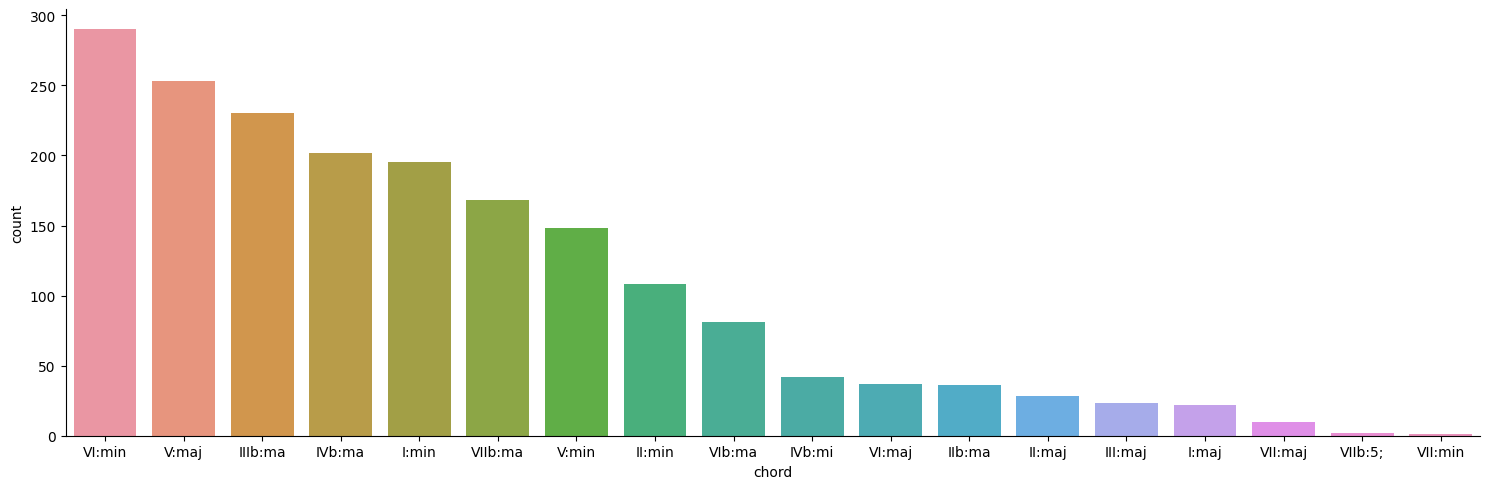

In [292]:
sns.catplot(x='chord', kind='count', data=data, height=5, aspect=3, order=data['chord'].value_counts().index)

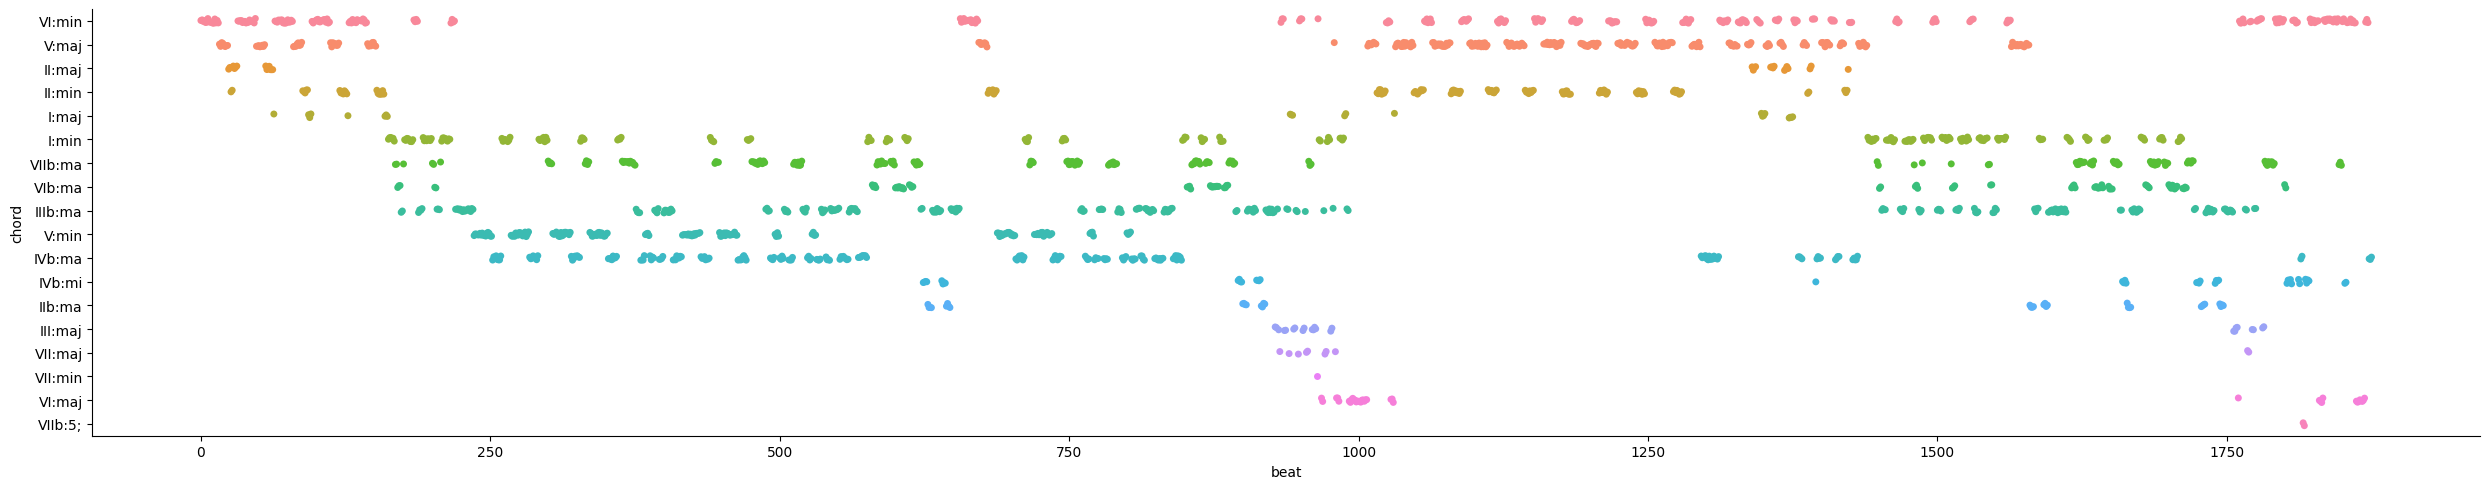

In [295]:
p = sns.catplot(x="beat", y="chord", data=data, height=5, aspect=5, s=5, kind='strip')
p

In [ ]:
enlaces = []
c = 0
while c < len(norm)-1:
    if norm[c] != norm[c+1]:
        enlaces.append(norm[c] +'/'+ norm[c+1])
        c += 1
    else:
        c += 1
enlaces

In [ ]:
enlaces_num = [[i, v] for i, v in enumerate(enlaces)]
enlaces_dict = {'beat':[],'chord':[]}
for i in enlaces_num:
    print(i)
    enlaces_dict['beat'].append(i[0])
    enlaces_dict['chord'].append(i[1])

enlaces_df = pd.DataFrame(enlaces_dict);

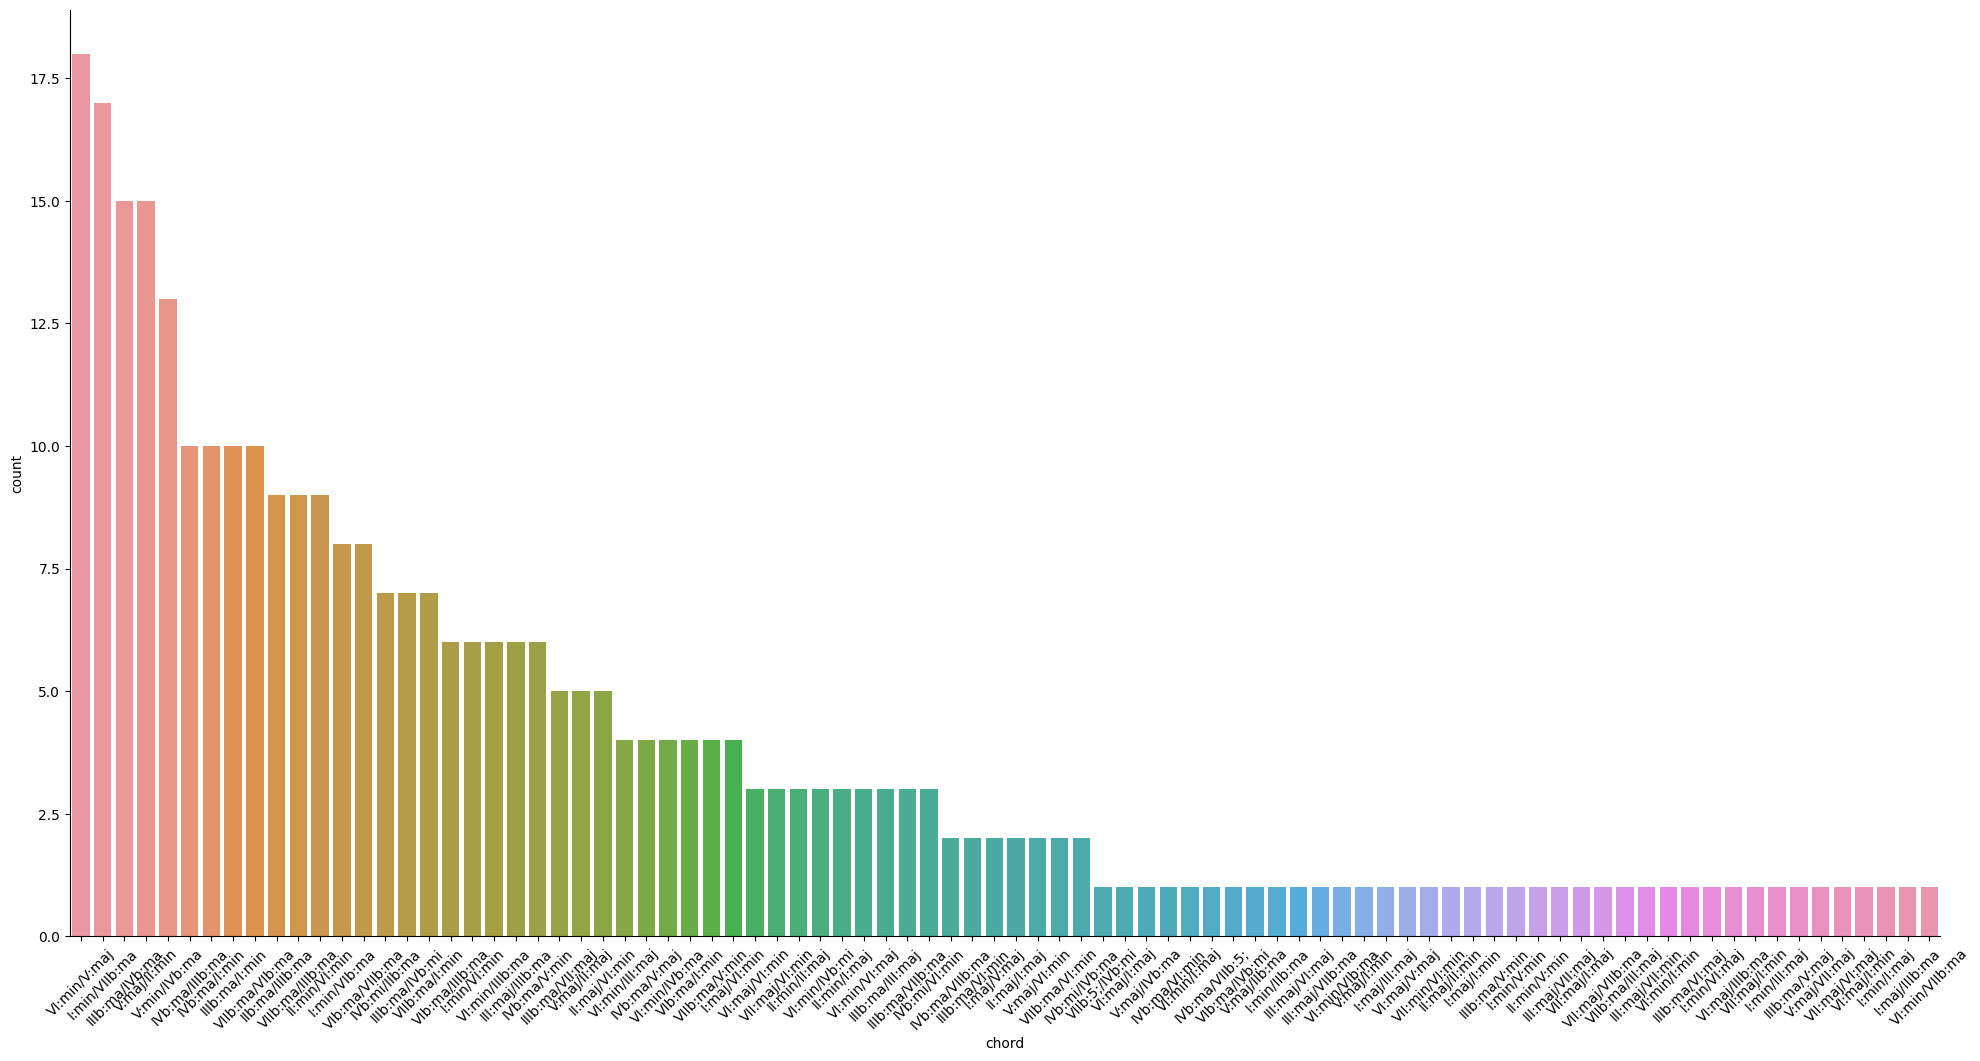

In [232]:
sns.catplot(x='chord', kind='count', data=enlaces_df, height=10, aspect=2, order=enlaces_df['chord'].value_counts().index)
plt.xticks(rotation = 45);